In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import analysis as a
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot


****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
 raw_spot_collections = [#"2018-01-24_E14_X31",
                         #"2018-01-24_E15_X31",
                         "2018-01-24_N21_Pan",
                         "2018-01-24_N22_Cal",
                         "2018-01-24_N23_X31",
                         ]
spots = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=raw_spot_collections)

#studies = ["2018-01-24_microarray"]
#spots = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)

In [13]:
spots = spots.exclude(raw_spot__lig_fix_batch__sid__in = ['P016','Dye001','pep61'])


# 1. Basic Approach
## No mean. Permutation within block.

In [14]:
data = a.Data(spots)
analysis = a.Analysis(data=data)
performance_tabels = []
for _ in range(20):
    data._safe_random_permutation(data.data, with_in="Block")
    analysis = a.Analysis(data=data)
    performance_tabels += tuple((analysis.performance_table(),))
df = pd.concat(performance_tabels,axis=0)
    

[u'Analyte Batch', u'Collection', u'Block', u'Replica']


/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

In [15]:
performace_mean = df.groupby(df.index).mean()    
performace_mean["Name"] = performance_tabels[0]["Name"]
performace_mean

,unweighted accuracy,true positive,false positive,true negative,false negative,Name
0,82.222222,82.222222,17.777778,91.111111,8.888889,Nearest Neighbors
1,48.888889,70.524892,29.475108,84.188919,15.811081,Decision Tree
2,88.333333,95.097222,4.902778,95.581036,4.418964,Random Forest
3,67.777778,80.630411,19.369589,89.235856,10.764144,AdaBoost
4,70.555556,98.730159,1.269841,87.595257,12.404743,Naive Bayes
5,59.444444,66.422980,33.577020,84.202433,15.797567,LDA


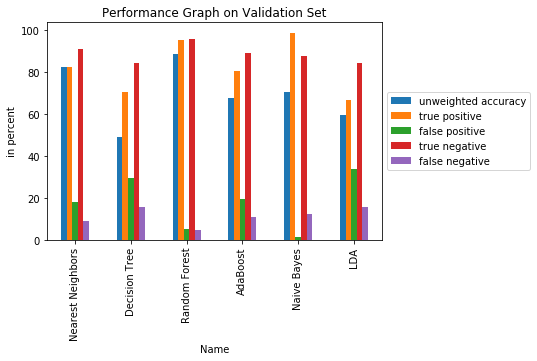

In [16]:
performace_mean.plot.bar("Name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance Graph on Validation Set')
plt.ylabel('in percent')
#plt.savefig('performance_validators_on_unprocest_shuffeld_data.png',bbox_inches='tight')
plt.show()

# 2. Mean Block Approach
## Mean on block. Permutation within microarray.

In [17]:
data = a.Data(spots,mean_on="Block")


[u'Analyte Batch', u'Collection', u'Block']


In [18]:
performance_tabels = []
for _ in range(20):
    analysis = a.Analysis(data=data)
    performance_tabels += tuple((analysis.performance_table(),))
    data._safe_random_permutation(data.data, with_in="Collection")


df = pd.concat(performance_tabels,axis=0)

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

In [19]:
performace_mean = df.groupby(df.index).mean()    
performace_mean["Name"] = performance_tabels[0]["Name"]
performace_mean

,unweighted accuracy,true positive,false positive,true negative,false negative,Name
0,90.000000,90.000000,10.000000,95.000000,5.000000,Nearest Neighbors
1,55.000000,69.583333,30.416667,81.666667,18.333333,Decision Tree
2,88.333333,90.833333,9.166667,99.166667,0.833333,Random Forest
3,73.333333,84.666667,15.333333,92.404762,7.595238,AdaBoost
4,0.000000,NaN,NaN,66.666667,33.333333,Naive Bayes
5,55.000000,85.000000,15.000000,84.178571,15.821429,LDA


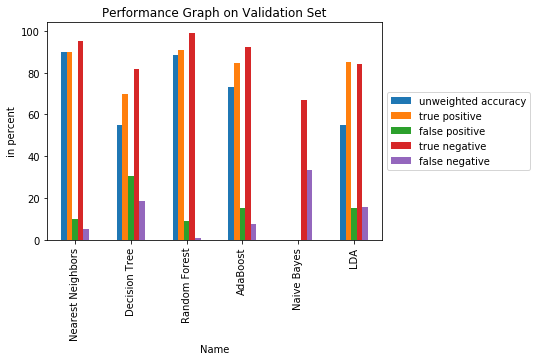

In [20]:
performace_mean.plot.bar("Name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance Graph on Validation Set')
plt.ylabel('in percent')
#plt.savefig('performance_validators_on_unprocest_shuffeld_data.png',bbox_inches='tight')
plt.show()